In [ ]:
!pip install torch
!pip install transformers
!pip install google-cloud-language
import os
from google.cloud import language_v1
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
# ignoring all the warnings
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.8 MB/s eta 0:00:00


In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
# {"username":"riya123456","key":"55c65243b721aaa27e1a1824b1ff171b"}
od.download('https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows?select=0820_UkraineCombinedTweetsDeduped.csv.gzip#:~:text=insert_drive_file-,0401_UkraineCombinedTweetsDeduped,-.csv.gzip')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: riya123456
Your Kaggle Key: ··········


100%|██████████| 16.7G/16.7G [04:09<00:00, 71.6MB/s]


In [ ]:
!pip install patool
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 6.2 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineWar/UkraineWar/0406_UkraineCombinedTweetsDeduped.csv.gzip",outdir="//content/Ukraine_War_Unzip")

patool: Extracting /content/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineWar/UkraineWar/0406_UkraineCombinedTweetsDeduped.csv.gzip ...
patool: running /usr/bin/7z e -o//content/Ukraine_War_Unzip -- /content/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineWar/UkraineWar/0406_UkraineCombinedTweetsDeduped.csv.gzip
patool: ... /content/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineWar/UkraineWar/0406_UkraineCombinedTweetsDeduped.csv.gzip extracted to `//content/Ukraine_War_Unzip'.


'//content/Ukraine_War_Unzip'

In [ ]:
df = pd.read_csv('/content/Ukraine_War_Unzip/0406_UkraineCombinedTweetsDeduped.csv')
#df_1 = pd.read_csv('/content/Ukraine_War_Unzip/0404_UkraineCombinedTweetsDeduped.csv')

In [ ]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,979681469735079936,Animus_Libero,NaN,"Tennessee, USA",456,37,665,2018-03-30 11:27:18.000000,1511493889588355076,2022-04-06 00:00:00.000000,55,⭕️Devastating \n👉Residents of Irpin in #Kiev’...,"[{'text': 'Kiev', 'indices': [53, 58]}]",en,NaN,0,2022-04-06 00:10:43.235757
1,1,1081484761934319623,LadyJules_Cath,"#3.5%.💙 #GTTO Love art, reading, continent, ca...","Surrey, United Kingdom",7111,6851,315447,2019-01-05 09:37:15.000000,1511493889785483270,2022-04-06 00:00:00.000000,2,@GOV2UK #JohnsonOut72 \n#CorruptToriesOut \n#T...,"[{'text': 'JohnsonOut72', 'indices': [25, 38]}...",und,NaN,0,2022-04-06 00:10:43.214605
2,2,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3240,61172,2011-09-08 02:34:54.000000,1511493890074832897,2022-04-06 00:00:00.000000,0,"Watch @RachelRizzo, @manpreetsethi01, Monish T...","[{'text': 'UkraineCrisis', 'indices': [83, 97]...",en,NaN,0,2022-04-06 00:10:43.197969
3,3,3115495914,MartinBowRiver,"Member of Parliament for Bow River, AB\n\nFace...","Bow River Riding, Alberta",1722,5572,5381,2015-03-29 15:09:38.000000,1511493890175483904,2022-04-06 00:00:00.000000,0,Canada's NATO military spending must meet the ...,"[{'text': 'cdnpoli', 'indices': [187, 195]}, {...",en,NaN,0,2022-04-06 00:10:43.188636
4,4,1037413937703055360,solh201306,NaN,NaN,120,19,4304,2018-09-05 18:55:31.000000,1511493890230349824,2022-04-06 00:00:00.000000,231,#ukraine\n#russianinvasion \n#bucha https://t....,"[{'text': 'ukraine', 'indices': [21, 29]}, {'t...",und,NaN,0,2022-04-06 00:16:36.757192


In [ ]:
df["location"].unique

<bound method Series.unique of 0                         NaN
1            Mankato, MN, USA
2         Diocese of Antipolo
3                     Germany
4                         NaN
                 ...         
452564              Kotlarovo
452565                    NaN
452566                 Lahore
452567              Vancouver
452568            Seattle, WA
Name: location, Length: 452569, dtype: object>

In [ ]:
df = df.sample(n=10000)
df = df[["username", "text", "language","usercreatedts","extractedts","tweetcreatedts"]]
df["usercreatedts"] = pd.to_datetime(df["usercreatedts"])
df["tweetcreatedts"] = pd.to_datetime(df["tweetcreatedts"])
df["extractedts"] = pd.to_datetime(df["extractedts"])

In [ ]:
len(df)

10000

In [ ]:
# Checking the Account Age
df["account_age"] = (df["extractedts"]-df["usercreatedts"])
df["account_age"] = df["account_age"].dt.days.astype('int64')

In [ ]:
# Filter out users based on tweets in a dat
df["username"].value_counts().sort_values(ascending=True)

michael_rauth      1
haraldnordlund     1
imdrinkingcum      1
Peebee9            1
dlotter            1
                  ..
igeusllc           8
UKRWarSitRep      10
FuckPutinBot      11
TheAnswerYes      12
TeamShakeri       13
Name: username, Length: 9320, dtype: int64

In [ ]:
df['account_age'].sort_values(ascending = True)

154236       0
84037        0
84734        0
102703       0
117319       0
          ... 
244811    5490
144124    5493
199212    5505
398772    5506
20278     5548
Name: account_age, Length: 10000, dtype: int64

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english') + stopwords.words('french'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the WordNet lemmatizer data
nltk.download('wordnet')
nltk.download('punkt')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each word
    lemmatized_text = ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a single string
    return lemmatized_text

# Example usage
text = "The cats are playing with each other"
lemmatized_text = lemmatize_text(text)
print(lemmatized_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The cat are playing with each other


In [ ]:
df.drop_duplicates(subset='text',inplace= True)
df.drop_duplicates(subset='tweetid',inplace= True)

In [ ]:
len(df)

5000

In [ ]:
#Function to Remove Bots and Duplicates from DataFrame

def remove_bots(df):
  df.drop_duplicates(subset='text',inplace= True)
  df.drop_duplicates(subset='tweetid',inplace= True)
  df.drop(df.loc[df['account_age']==0].index,inplace=True)
  user_counts = df["username"].value_counts()
  users_to_remove = user_counts[user_counts > 10].index
  bots_df= df[df['username'].isin(users_to_remove)]
  df = df[~df['username'].isin(users_to_remove)]
  return df, bots_df

In [ ]:
#Trial function WORKS

def remove_bots(df):
  duplicates_df = df[df.duplicated(subset='text')] # | df.duplicated(subset='tweetid')]

  zero_age_df = df[df['account_age'] == 0]

  user_counts = df["username"].value_counts()
  users_to_remove = user_counts[user_counts > 4].index

  combined_df = pd.concat([duplicates_df, zero_age_df, df[df['username'].isin(users_to_remove)]])

  cleaned_df = df[~df['username'].isin(users_to_remove) & ~df.duplicated(subset='text')]# & ~df.duplicated(subset='tweetid')]
  new_cleaned_df = cleaned_df.copy()

  return new_cleaned_df, combined_df
  #new_cleaned_df= the cleaned dataset after removing bots
  #combined_df= dataset of bots + duplicates



In [ ]:
#Bots seperation works (*T&C apply)
def remove_bots(df):
    user_counts = df["username"].value_counts()
    users_to_remove = user_counts[user_counts > 4].index

    duplicates_df = df[df.duplicated(subset='text') | df.duplicated(subset='tweetid')]
    zero_age_df = df[df['account_age'] == 0]
    bots_df = df[df['username'].isin(users_to_remove)]

    combined_df = pd.concat([duplicates_df, zero_age_df, bots_df])

    cleaned_df = df[~df['username'].isin(users_to_remove) & ~df.duplicated(subset='text') & ~df.duplicated(subset='tweetid')]
    new_cleaned_df = cleaned_df.copy()

    return new_cleaned_df, combined_df

In [ ]:
len(bots_df)

NameError: ignored

In [ ]:
new_cleaned_df, combined_df= remove_bots_final(df)

In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    text = lemmatize_text(text)
    return text
def remove_emojies(text):
  EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
  text = re.sub(EMOJI_PATTERN, '', text)
  return text

In [ ]:
new_cleaned_df["text"] = new_cleaned_df["text"].apply(clean)
new_cleaned_df["text"] = new_cleaned_df["text"].apply(remove_emojies)

In [ ]:
combined_df["text"] = combined_df["text"].apply(clean)
combined_df["text"] = combined_df["text"].apply(remove_emojies)

In [ ]:
df = df[["username", "text", "language"]]

In [ ]:
combined_df= combined_df[["username", "text", "language"]]

In [ ]:
new_cleaned_df= new_cleaned_df[["username", "text", "language"]]

**Data Ready for Model**

In [ ]:
# importing the pipeline module
from transformers import pipeline

# Downloading the sentiment analysis model
SentimentClassifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:

# Defining a function to call for the whole dataframe
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])
def FunctionBERTSentimentScore(inpText):
  return(SentimentClassifier(inpText)[0]['score'])


In [ ]:
# Calling BERT based sentiment score function for every tweet
df['Sentiment']=df['text'].apply(FunctionBERTSentiment)
df['Score']=df['text'].apply(FunctionBERTSentimentScore)

In [ ]:
combined_df['Sentiment']=combined_df['text'].apply(FunctionBERTSentiment)
combined_df['Score']=combined_df['text'].apply(FunctionBERTSentimentScore)

KeyboardInterrupt: ignored

In [ ]:
len(new_cleaned_df)

In [ ]:
new_cleaned_df['Sentiment']=new_cleaned_df['text'].apply(FunctionBERTSentiment)
new_cleaned_df['Score']=new_cleaned_df['text'].apply(FunctionBERTSentimentScore)

In [ ]:
bots_sample= combined_df.sample(n=2000)

In [ ]:
len(bots_sample)

2000

In [ ]:
bots_sample

,username,text,language
351692,zb27665829,usambosc военные преступления не просто случаю...,ru
207413,MustangWagon,histeria biden contra putin debe al escándalo ...,es
169058,yoga_and_more,good morn ️ ️ standwithukrain katzengegenhass,en
57782,squidy_J33,entir neighborhood bucha destroy ukrain,en
343858,Przemek53673079,ukrain insan combat footag show singl ukrainia...,en
...,...,...,...
237548,TLPrinceitisme,urkain kriegsverbrechen al wimmelbild wie wir ...,de
307978,lizmalo08544661,russia no comment,fr
150265,KibatTigraweyti,world focus ukrain urg member forget tigray re...,en
284336,Orwell84_,secur servic ukrain journalist wasforc deport ...,en


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,
                            ascending=False).head(20)
countdf[1:11]

In [ ]:
# Defining a function to call for the whole dataframe
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])


# Calling BERT based sentiment score function for every tweet
df['Sentiment']=df['text'].apply(FunctionBERTSentiment)
df['Score']=df['text'].apply(FunctionBERTSentimentScore)


KeyboardInterrupt: ignored

In [ ]:
df['Score']=df['text'].apply(FunctionBERTSentimentScore)

In [ ]:
dk = df.groupby('Sentiment').count()
dk

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,account_age,Bias,Score
Sentiment,,,,,,,,,,,,,,,,,,,,,
NEGATIVE,723,723,723,549,402,723,723,723,723,723,...,723,723,723,723,0,723,723,723,723,723
POSITIVE,87,87,87,74,52,87,87,87,87,87,...,87,87,87,87,0,87,87,87,87,87


In [ ]:
dbots= combined_df.groupby('Sentiment').count()
dbots

In [ ]:
vectorizer = CountVectorizer()
countVector = vectorizer.fit_transform(df['text'])
count_vect_df = pd.DataFrame(
    countVector.toarray(),
  columns=vectorizer.get_feature_names_out())
count_vect_df.head()
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,
                            ascending=False).head(20)
Word_Count = countdf[0:10]
Word_Count

In [ ]:
df.loc[df['Sentiment'] == 'NEGATIVE', 'Score'] = -df['Score']

In [ ]:
combined_df.reset_index(drop=True, inplace=True)
combined_df.loc[combined_df['Sentiment'] == 'NEGATIVE', 'Score'] *= -1

In [ ]:
combined_df.loc[combined_df['Sentiment'] == 'NEGATIVE', 'Score'] = - combined_df['Score']

ValueError: ignored

In [ ]:
Average_Sentiment = combined_df['Score'].mean()
Average_Sentiment

-0.8642599184738531

In [ ]:
df.head()

,username,text,language,Sentiment,Score
155893,newsvishvas,fact check video made combin clip two differ s...,en,NEGATIVE,-0.991081
76061,dackel_anton,usa biden supremecourt,und,POSITIVE,0.995092
177642,masters_sidney,osc ambassador includ usambosc walk today perm...,en,NEGATIVE,-0.993495
255270,seraikham,iranha caution foreign intervent intern affair...,en,NEGATIVE,-0.970608
35670,LisatiredofJim,russian spi germani mani unit state welcom pa...,en,NEGATIVE,-0.986245


In [ ]:
combined_df

,username,text,language,Sentiment,Score
0,Stanimi83962985,iryna russia came land learn makeup plan live ...,en,NEGATIVE,-0.989776
1,AgainsTyrants,solitari protest call buchamoscow took place m...,en,NEGATIVE,-0.993060
2,Ivannam28686601,dog leav owner kill russian invad kyiv region,en,NEGATIVE,-0.986681
3,AdamDenhof,solitari protest call buchamoscow took place m...,en,NEGATIVE,-0.993060
4,maribiel1,boy stand near grave mother murder russian sol...,en,NEGATIVE,-0.951995
...,...,...,...,...,...
1740,addxlm,andrewbgreen glasnostgon four plea standwithuk...,en,NEGATIVE,-0.995203
1741,FuckPutinBot,પોતાને વાહિયાત જાઓ પુતિનgujaratiistandwithukra...,gu,NEGATIVE,-0.989760
1742,TeamShakeri,bucha march russian armi town mayor bucha said...,en,NEGATIVE,-0.994047
1743,leifdahlberg,ukrain ukrainian forc brigad front destroy rus...,en,NEGATIVE,-0.992061


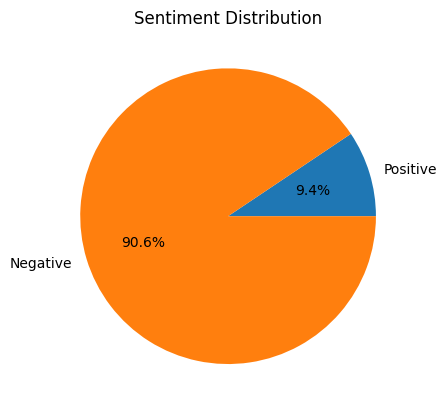

In [ ]:
# PIE CHART
positive_tweets = df[df['Sentiment'] == 'POSITIVE']
negative_tweets = df[df['Sentiment'] == 'NEGATIVE']
#neutral_tweets = df[df['Sentiment'] == 'NEUTRAL']

sentiment_counts = [len(positive_tweets), len(negative_tweets)]
labels = ['Positive', 'Negative']

plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
#Sentiment Score for Putin and Zelenskyy

putin_tweets = df[df['text'].str.contains('Putin', case=False)]
zelensky_tweets = df[df['text'].str.contains('Zelenskyy', case=False)]

average_score_putin = putin_tweets['Score'].mean()
average_score_zelensky = zelensky_tweets['Score'].mean()

print(f"Average Sentiment Score for Tweets containing 'Putin': {average_score_putin}")
print(f"Average Sentiment Score for Tweets containing 'Zelenskyy': {average_score_zelensky}")


Average Sentiment Score for Tweets containing 'Putin': -0.8564591872180166
Average Sentiment Score for Tweets containing 'Zelenskyy': -0.27040691839324105


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 138917 to 131706
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   username   500 non-null    object 
 1   text       500 non-null    object 
 2   language   500 non-null    object 
 3   Sentiment  500 non-null    object 
 4   Score      500 non-null    float64
dtypes: float64(1), object(4)
memory usage: 39.6+ KB


In [ ]:


df.drop_duplicates(subset='text',inplace= True)

#word cloud up
languages sentiment score each
for loop for accessing files

In [ ]:
duplicateRows = df[df.duplicated(['text'])]
duplicateRows

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,account_age


In [ ]:
classifier = pipeline("zero-shot-classification")
def Zero_Shot(inpText):
  return(classifier(inpText,candidate_labels=["war", "peace"])[0]['label'])

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
def Zero_Shot(inpText):
  result = (classifier(inpText,candidate_labels=["war", "peace"]))
  del result['sequence']
  label_scores = zip(result['labels'], result['scores'])
  max_score_label = max(label_scores, key=lambda x: x[1])
  return max_score_label[0]

Zero_Shot("Ukarine wants order but Russia wants to kill")


'war'

In [ ]:
df['Words'] = df['text'].apply(Zero_Shot)

In [ ]:
df.groupby('Words').count()

,username,text,language,usercreatedts,extractedts,tweetcreatedts
Words,,,,,,
peace,15,15,15,15,15,15
war,85,85,85,85,85,85


In [ ]:
def Bias(inpText):
  result = (classifier(inpText,candidate_labels=["Russia", "Ukraine"]))
  del result['sequence']
  label_scores = zip(result['labels'], result['scores'])
  max_score_label = max(label_scores, key=lambda x: x[1])
  return max_score_label[0]

In [ ]:
df = df.sample(n=1000)
df['Bias'] = df['text'].apply(Bias)

In [ ]:
df.groupby('Bias').count()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,account_age
Bias,,,,,,,,,,,,,,,,,,,
Russia,284,284,284,210,154,284,284,284,284,284,284,284,284,284,284,0,284,284,284
Ukraine,716,716,716,567,420,716,716,716,716,716,716,716,716,716,716,0,716,716,716


In [ ]:

df_group =  df.groupby(['Bias','Sentiment']).count()
df_group['userid']

Bias     Sentiment
Russia   NEGATIVE     272
         POSITIVE      12
Ukraine  NEGATIVE     598
         POSITIVE     118
Name: userid, dtype: int64

In [ ]:
#Final Cell to get the results all together

df["usercreatedts"] = pd.to_datetime(df["usercreatedts"])
df["tweetcreatedts"] = pd.to_datetime(df["tweetcreatedts"])
df["extractedts"] = pd.to_datetime(df["extractedts"])
df["account_age"] = (df["extractedts"]-df["usercreatedts"])
df["account_age"] = df["account_age"].dt.days.astype('int64')
new_cleaned_df, combined_df= remove_bots(df)

new_cleaned_df= new_cleaned_df[["username", "text", "language"]]
combined_df= combined_df[["username", "text", "language"]]

new_cleaned_df = new_cleaned_df.sample(n=1000)
combined_df = combined_df.sample(n=1000)

new_cleaned_df["text"] = new_cleaned_df["text"].apply(clean)
new_cleaned_df["text"] = new_cleaned_df["text"].apply(remove_emojies)

combined_df['Sentiment']=combined_df['text'].apply(FunctionBERTSentiment)
combined_df['Score']=combined_df['text'].apply(FunctionBERTSentimentScore)

combined_df.loc[combined_df['Sentiment'] == 'NEGATIVE', 'Score'] = - combined_df['Score']

new_cleaned_df['Sentiment']=new_cleaned_df['text'].apply(FunctionBERTSentiment)
new_cleaned_df['Score']=new_cleaned_df['text'].apply(FunctionBERTSentimentScore)

new_cleaned_df.loc[new_cleaned_df['Sentiment'] == 'NEGATIVE', 'Score'] = - new_cleaned_df['Score']



Average_Sentiment_new = new_cleaned_df['Score'].mean()
Average_Sentiment_combined = combined_df['Score'].mean()






Average_Sentiment_new
Average_Sentiment_combined





In [ ]:
def remove_bots_1(df):
  df.drop_duplicates(subset='text',inplace=True)
  df.drop(df.loc[df['account_age']==0].index,inplace = True)
  user_counts = df["username"].value_counts()
  users_to_remove = user_counts[user_counts > 10].index
  df = df[~df['username'].isin(users_to_remove)]
  return df

In [ ]:
clean_df = remove_bots_1(df)
bots = df_1[~df_1['tweetid'].isin(clean_df['tweetid'])]


In [ ]:
clean_df["text"] = clean_df["text"].apply(clean)
clean_df["text"] = clean_df["text"].apply(remove_emojies)

clean_df['Sentiment']=clean_df['text'].apply(FunctionBERTSentiment)
clean_df['Score']=clean_df['text'].apply(FunctionBERTSentimentScore)
clean_df.loc[clean_df['Sentiment'] == 'NEGATIVE', 'Score'] = -clean_df['Score']


In [ ]:
bots["text"] = bots["text"].apply(clean)
bots["text"] = bots["text"].apply(remove_emojies)

bots['Sentiment']=bots['text'].apply(FunctionBERTSentiment)
bots['Score']=bots['text'].apply(FunctionBERTSentimentScore)
bots.loc[bots['Sentiment'] == 'NEGATIVE', 'Score'] = -bots['Score']
Average_Sentiment_clean = clean_df['Score'].mean()
Average_Sentiment_bots = bots['Score'].mean()

[{'label': 'NEGATIVE', 'score': 0.946144700050354}]